# Task 3

The goal of this task is to test several models with different explanatory variables through:

1. An Anova with the individual's country as the only explanatory variable. 

2. A linear regression including as explanatory variables only the mean income and the Gini index of the individual 's country.

3. A linear regression including as explanatory variables the mean income, the Gini index of the individual 's country and the parent’s income class.

For each regression, two versions should be tested: 

* One by expressing the country's mean income and the child income in terms of logarithm (ln)

* Another by leaving the three as they are. Please choose the best-performing version

Select the best-performing version

After, the project manager would like the models used to verify some of the researcher's assertions. 

Assertions to be checked:

* Based on the regression coefficient associated with the Gini index, there are more people disadvantaged by living in a more unequal country than there are people who benefit

* By analyzing the total variance decomposition, 60% of the total variance is explained by the country alone (mean income and Gini index) and that 80% of the total variance is explained by the country and the parents’ income alone. That would mean that only the remaining 20% are due to other factors such as : effort, chance, etc.

The project manager would then like it to be checked if the model is worth using, and to have his income predicted knowing that his parents earned approximately the mean income of the country. 

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set()
%matplotlib inline

The sample includes the following variables: 

* __countryname__

* __y_child__ is the income

* __base_case__ is the elasticity coefficient

* __gj__ is the Gini Index

* __mj__ is the mean income of the country 

* __c_i_parent__ is the parent income class

In [2]:
sample = pd.read_csv('sample.csv')
sample.head()

,countryname,y_child,base_case,gj,mj,c_i_parent
0,Albania,728.89795,0.4,30.0,2994.829902,2
1,Albania,728.89795,0.4,30.0,2994.829902,3
2,Albania,728.89795,0.4,30.0,2994.829902,7
3,Albania,728.89795,0.4,30.0,2994.829902,7
4,Albania,728.89795,0.4,30.0,2994.829902,65


In [3]:
sample.dtypes

countryname     object
y_child        float64
base_case      float64
gj             float64
mj             float64
c_i_parent       int64
dtype: object

In [4]:
sample.shape

(5800000, 6)

## Performing an ANOVA test

Perform an analaysis of variance with the individual's country as the only explanatory variable. An anova is used to analyse the differences in the mean of groups of samples.

The question being asked is: Does the country of origin impact the income of the individual?

The two hypotheses are: 

__H0__: There is no significant difference between the mean child's income in the different countries.

__H1__: There is a significant difference between the mean child's income in the different countries.


### Performing the multivariate linear regression 

In [5]:
sample.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
0,Albania,728.89795,0.4,30.0,2994.829902,2
1,Albania,728.89795,0.4,30.0,2994.829902,3
2,Albania,728.89795,0.4,30.0,2994.829902,7


In [6]:
sample_2 = sample.groupby(['countryname', 'y_child']).mean()

In [7]:
sample_2.reset_index(inplace=True)

In [8]:
sample_2.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
0,Albania,728.89795,0.4,30.0,2994.829902,13.900
1,Albania,916.66235,0.4,30.0,2994.829902,18.668
2,Albania,1010.91600,0.4,30.0,2994.829902,21.012


In [9]:
results = smf.ols('y_child~countryname', data = sample_2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_child   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     98.43
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:54   Log-Likelihood:            -1.1862e+05
No. Observations:               11600   AIC:                         2.375e+05
Df Residuals:                   11484   BIC:                         2.383e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        2994.8299    671.390      4.461      0.000    1678.790    4310.870
countryname[T.Argentina]                         2853.0548    949.489      3.005      0.003     991.893    4714.216
countryname[T.Armenia]                          -1366.4471    949.489     -1.439      0.150   -3227.608     494.714
countryname[T.Austria]                           1.364e+04    949.489     14.369      0.000    1.18e+04    1.55e+04
countryname[T.Azerbaijan]                        -637.4009    949.489     -0.671      0.502   -2498.562    1223.760
countryname[T.Bangladesh]                       -1996.1375    949.489     -2.102      0.036   -3857.299    -134.976
countryname[T.Belarus]                            926.3336    949.489      0.976      0.329    -934.828    2787.495
countryname[T.Belgium]                           1.203e+04    949.489     12.670      0.000    1.02e+04    1.39e+04
countryname[T.Bhutan]                           -1478.9008    949.489     -1.558      0.119   -3340.062     382.260
countryname[T.Bolivia]                             21.4339    949.489      0.023      0.982   -1839.727    1882.595
countryname[T.Bosnia and Herzegovina]            3339.8574    949.489      3.518      0.000    1478.696    5201.019
countryname[T.Brazil]                            1812.6547    949.489      1.909      0.056     -48.507    3673.816
countryname[T.Bulgaria]                          1990.1487    949.489      2.096      0.036     128.987    3851.310
countryname[T.Burkina Faso]                     -2076.8772    949.489     -2.187      0.029   -3938.039    -215.716
countryname[T.Cambodia]                         -1508.4897    949.489     -1.589      0.112   -3369.651     352.672
countryname[T.Cameroon]                         -1200.3359    949.489     -1.264      0.206   -3061.497     660.825
countryname[T.Canada]                            2.074e+04    949.489     21.848      0.000    1.89e+04    2.26e+04
countryname[T.Central African Republic]         -2183.5300    949.489     -2.300      0.021   -4044.691    -322.369
countryname[T.Chile]                             4056.7801    949.489      4.273      0.000    2195.619    5917.941
countryname[T.China]                             -472.0712    949.489     -0.497      0.619   -2333.232    1389.090
countryname[T.Colombia]                           552.1754    949.489      0.582      0.561   -1308.986    2413.337
countryname[T.Costa Rica]                        2585.5567    949.489      2.723      0.006     724.395    4446.718
countryname[T.Cote d'Ivoire]                    -2594.9947    949.489     -2.733      0.006   -4456.156    -733.833
countryname[T.Croatia]                           4721.6359    949.4

The results for the regression show: 

* The r-squared is .496

* The Adj. R-squared is .491

### Applying the ANOVA

In [10]:
aov_table = sm.stats.anova_lm(results)
print(aov_table)

                  df        sum_sq       mean_sq          F  PR(>F)
countryname    115.0  5.102375e+11  4.436848e+09  98.429271     0.0
Residual     11484.0  5.176586e+11  4.507651e+07        NaN     NaN


If the null hypothesis were to be true, the F value would be close to 1. A large __F-value, like the 98.429271 value above__, means the observed variation between the categories is not happening by chance. 

Therefore, we can reject the H0 hypothesis. The country variable does have a significant influence on the individual's income. 

#### Evaluating the model by finding the r-squared

In [11]:
x = sample_2['countryname']
y = sample_2['y_child']

In [12]:
def r_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS

In [13]:
r_squared(sample_2['countryname'],sample_2['y_child'])

0.49639014231099604

Seeing as the r^2 is in the middle between 0 and 1 at __0.49639__, it suggests the two variables may be somewhat correlated.

## Performing a linear regression using mean income & gini index

### Using the explanatory variables as they are

Performing a linear regression including as explanatory variables only the mean income and the Gini index of the individual 's country. With these two variables going into the model as explanatory variables, there are two pairs of hypotheses:

#### Mean Income (mj):

__H0(mj)__: There is no significant difference between the mean childrens' incomes in the different countries and the mean income.

__H1(mj)__: There is a significant difference between the mean childrens' incomes in the different countries and the mean income.

#### Gini Index (gj):

__H0(gj)__: There is no significant difference between the Gini Indexes in the different countries.

__H1(gj)__: There is a significant difference between the Gini Indexes in the different countries.


In [14]:
subsample = sample.sample(n=10000)
subsample.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
1713561,Fiji,1011.5624,0.5,40.4,2098.730882,77
3772401,Nepal,687.4424,0.5,27.0,914.391651,12
742524,Cambodia,2220.3310,0.5,31.5,1486.340247,83


In [15]:
model = smf.ols('y_child ~ gj + mj', data=subsample)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     5393.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:55   Log-Likelihood:            -1.0177e+05
No. Observations:               10000   AIC:                         2.036e+05
Df Residuals:                    9997   BIC:                         2.036e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    196.8890    308.148      0.639      0.5

We can see that with this model:

* The __gj p-value is .048__, meaning it is likely significant as a variable

* The __mj p-value is 0__, meaning it is likely significant as a variable

* The __R-squared is .498__, meaning about less than half of income is explained by the gini and mean income 

* The __log-likelihood is -1.0236e+05__. The higher the log-likelihood is, the better, so this is promising. 

Returning to the hypotheses, it is safe to say:

#### Mean Income (mj):

We reject the null hypothesis, and so we can say the difference between children's income in a country, and that same country's mean income, is significant.

#### Gini Index (gj):

We reject the null hypothesis, meaning the difference in the Gini Index between countries is significant.

### Using the country's mean income and the child income in terms of logarithm (ln)

#### Creating the log version of a subsample

In [16]:
sub_log = subsample.copy()
sub_log.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
1713561,Fiji,1011.5624,0.5,40.4,2098.730882,77
3772401,Nepal,687.4424,0.5,27.0,914.391651,12
742524,Cambodia,2220.3310,0.5,31.5,1486.340247,83


In [17]:
sub_log['y_child'] = np.log(sub_log['y_child'])

In [18]:
sub_log['mj'] = np.log(sub_log['mj'])

#### Using the log version with the model

In [19]:
model = smf.ols('y_child ~ gj + mj', data=sub_log)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:55   Log-Likelihood:                -10951.
No. Observations:               10000   AIC:                         2.191e+04
Df Residuals:                    9997   BIC:                         2.193e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1925      0.064      2.994      0.0

In [20]:
results.pvalues

Intercept    2.760690e-03
gj           1.490216e-50
mj           0.000000e+00
dtype: float64

In [21]:
results.rsquared

0.7274202503385493

In [22]:
results.llf

-10951.149494797668

We can see that with this model:

* The __gj p-value is near 0__, meaning it is significant in explaining the child's income

* The __mj p-value is 0__, meaning it is significant in explaining the child's income

* The __R-squared is .723__, meaning a near majority of income is explained by the gini and mean income 

* The __log-likelihood is -10875.382037686315__. The higher the log-likelihood is, the better, so this is not great, but it isn't as bad, either. 

Returning to the hypotheses:

#### Mean Income log(mj):

We reject the null hypothesis, and so we can say that there is a significant difference between children's classes mean incomes and the mean income in the country. 

#### Gini Index log(gj):

We reject the null hypothesis, meaning there is a signicant difference in the Gini Index between countries. 

__Overall, the log model with these explanatory variables performs better than the version that is not logged.__

## Performing a linear regression + parent's income class

The linear regression includes as explanatory variables the mean income, the Gini index of the individual 's country, and the parent's income class. With these three variables going into the model as explanatory variables, there are three pairs of hypotheses:

#### Mean Income (mj):

__H0(mj)__: There is no significant difference between the mean childrens' incomes in the different countries and the mean income.

__H1(mj)__: There is a significant difference between the mean childrens' incomes in the different countries and the mean income.

#### Gini Index (gj):

__H0(gj)__: There is no significant difference between the Gini Indexes in the different countries.

__H1(gj)__: There is a significant difference between the Gini Indexes in the different countries.

#### Parent's Income Class (c_i_parent)

__H0(c_i_parent)__: There is no significant difference between the parent income classes in the different countries.

__H1(c_i_parent)__: There is a significant difference between the parent income classes in the different countries.


## Performing the linear regression 

The explanatory variables include the mean income, the Gini index and the parent's income class

In [23]:
model = smf.ols('y_child ~ mj + gj + c_i_parent', data=subsample)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     4374.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:55   Log-Likelihood:            -1.0124e+05
No. Observations:               10000   AIC:                         2.025e+05
Df Residuals:                    9996   BIC:                         2.025e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3361.7800    310.854    -10.815      0.0

In [24]:
results.pvalues

Intercept      4.143207e-27
mj             0.000000e+00
gj             5.214701e-01
c_i_parent    1.170447e-233
dtype: float64

In [25]:
results.rsquared

0.5676163252477398

In [26]:
results.llf

-101239.69370562393

We can see that with this model:

* The __mj p-value is 0__, meaning it is significant in explaining the child's income

* The __gj p-value is .052__, meaning it is significant in explaining the child's income

* The __c_i_parent is near 0__, meaning it is significant in explaining the child's income

* The __R-squared is .536__, meaning about half of income is explained by the gini, mean income and parent class

* The __log-likelihood is -101871.49706866922__. The higher the log-likelihood is, the better, so this is not promising. 

In regards to the hypotheses stated earlier: 

#### Mean Income (mj):

We reject the null hypothesis, so we can say there is a significant difference between children's classes mean incomes and the mean income in the country. 

#### Gini Index (gj):

We reject the null hypothesis, meaning there is not a significant difference in the Gini Index between countries. 

#### Parent Income Class (c_i_parent):

We reject the null hypothesis, so we can say there is a significant difference between children's income and their parent classes in individual countries. 

### Using the country's mean income and the child income in terms of logarithm (ln)

In [27]:
sub_log.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
1713561,Fiji,6.919251,0.5,40.4,7.649088,77
3772401,Nepal,6.532978,0.5,27.0,6.818259,12
742524,Cambodia,7.705412,0.5,31.5,7.304072,83


In [28]:
sub_log.head(3)

,countryname,y_child,base_case,gj,mj,c_i_parent
1713561,Fiji,6.919251,0.5,40.4,7.649088,77
3772401,Nepal,6.532978,0.5,27.0,6.818259,12
742524,Cambodia,7.705412,0.5,31.5,7.304072,83


In [29]:
model = smf.ols('y_child ~ mj + gj + c_i_parent', data=sub_log)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:55   Log-Likelihood:                -9460.6
No. Observations:               10000   AIC:                         1.893e+04
Df Residuals:                    9996   BIC:                         1.896e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4730      0.057     -8.369      0.0

In [30]:
results.pvalues

Intercept     6.598744e-17
mj            0.000000e+00
gj            9.931814e-67
c_i_parent    0.000000e+00
dtype: float64

In [31]:
results.rsquared

0.7976867267354619

In [32]:
results.llf

-9460.5801108651

We can see that with this model:

* The __mj p-value is 0__, meaning it is not reliable in explaining the child's income

* The __gj p-value is near 0__, meaning it may be a factor in explaining the child's income

* The __c_i_parent is near 0__, meaning it is not reliable in explaining the child's income

* The __R-squared is .797__, meaning a majority of income is explained by the gini, mean income and parent class

* The __log-likelihood is -9460.5801108651__. The higher the log-likelihood is, the better, so this is not promising. 

In regards to the hypotheses stated earlier: 

#### Mean Income (mj):

We reject the null hypothesis, and so we can say that there is a significant difference between children's classes mean incomes and the mean income in the country. 

#### Gini Index (gj):

We reject the null hypothesis, meaning there is a difference in the Gini Index between countries. 

#### Parent Income Class (c_i_parent):

We reject the null hypothesis, and so we can say that there is a significant difference between children's income and their parent classes in individual countries. 

## Selecting the best performing model

The best performing model is the __log version of the 'y_child ~ mj + gj + c_i_parent' model__. It has the best r-squared value at .797 and permissable p-values.

In [33]:
model = smf.ols('y_child ~ mj + gj + c_i_parent', data=sub_log)
log_results = model.fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 1.314e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:58:55   Log-Likelihood:                -9460.6
No. Observations:               10000   AIC:                         1.893e+04
Df Residuals:                    9996   BIC:                         1.896e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4730      0.057     -8.369      0.0

## Verifying the researcher's facts 

In this section, the project manager would like some of the researcher's assertions to be verified. 

Assertions to be checked:

* Based on the regression coefficient associated with the Gini index, there are more people disadvantaged by living in a more unequal country than there are people who benefit

* By analyzing the total variance decomposition, 60% of the total variance is explained by the country alone (mean income and Gini index) and that 80% of the total variance is explained by the country and the parents’ income alone. That would mean that only the remaining 20% are due to other factors such as : effort, chance, etc.

The project manager would then like it to be checked if the model is worth using, and to have his income predicted knowing that his parents earned approximately the mean income of the country. 

### Finding the regression coefficient

In [46]:
print(log_results.params)

# the regression coefficient associated with the Gini Index is negative

Intercept    -0.473043
mj            1.004837
gj           -0.012508
c_i_parent    0.012696
dtype: float64


The regression coefficient for the Gini Index is negative at __-0.012508__. As the researcher claims, this shows that living in a low-mobility country is more likely to be of a disadvantage to the individual, and their children, than it is likely to help. It calls to mind the plotting of conditional distributions in Task 2 of this project. 

In countries with greater inequality, the conditional distributions give benefit to the higher income classes, whose income will be higher, and harms lower income classes with a declining income. As researcher Branko Milanovic writes in "Global inequality of opportunity": "Overall, there are more of the latter and that is why in regressions [...] the coefficient on Gini is negative" (page 24).

### Analyzing the total variance decomposition

Verify whether or not: "60% of the total variance is explained by the country alone (mean income and Gini index) and that 80% of the total variance is explained by the country and the parents’ income alone. That would mean that only the remaining 20% are due to other factors such as : effort, chance, etc."

To analyze the total variance decomposition, I will pull up the explained variance score, which is the mean of error/the mean residue. While R^2 can indicate whether the actual y-value and predicted y-value have the same variance, the mean of error tests whether or not that's true. 

#### Finding the explained variance for logged mj + gj + c_i_parent model

In [35]:
aov_table = sm.stats.anova_lm(results)
print(aov_table)

                df        sum_sq       mean_sq             F        PR(>F)
mj             1.0  13846.038591  13846.038591  35636.134374  0.000000e+00
gj             1.0    118.359071    118.359071    304.625740  3.194648e-67
c_i_parent     1.0   1348.916281   1348.916281   3471.762810  0.000000e+00
Residual    9996.0   3883.838811      0.388539           NaN           NaN


In [36]:
aov_table['perc_variance'] = 100 * (aov_table['sum_sq']/sum(aov_table['sum_sq']))
aov_table

,df,sum_sq,mean_sq,F,PR(>F),perc_variance
mj,1.0,13846.038591,13846.038591,35636.134374,0.000000e+00,72.125480
gj,1.0,118.359071,118.359071,304.625740,3.194648e-67,0.616545
c_i_parent,1.0,1348.916281,1348.916281,3471.762810,0.000000e+00,7.026648
Residual,9996.0,3883.838811,0.388539,NaN,NaN,20.231327


In looking at the percentages of the total variance, the numbers closely align with with the researcher's claims. 

The researcher claimed:

* 60% is country alone (mj + gj)

* 80% is country and parents income

* 20% is left for other factors 

The model shows: 

* Roughly 73% is country alone (mj + gj)

* Roughly 80% is country and parents income

* Roughly 20% remains for other factors 

### Seeing if the model is worth using

To measure the quality of the model, I will: 

* Check the residuals of the model

* Check for heteroskedasticity

* Measure the performance with RMSE

#### Checking the residuals of the model 

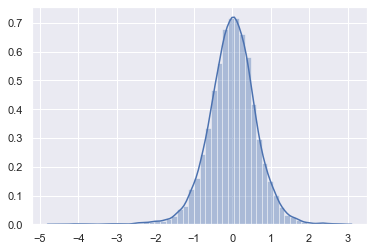

In [37]:
sns.distplot(log_results.resid)
# The residuals appear to be normally distributed

In [38]:
# running a Kolmogorov Smirnoff test on the residuals
from scipy import stats
stats.kstest(log_results.resid , 'norm')
# With a p-value near 0, we cannot reject the null hypothesis that the residuals are close to being normally distributed

KstestResult(statistic=0.1339216858869755, pvalue=3.307070232949062e-156)

#### Checking auto correlation of the resiudals 

In [39]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(log_results.resid, axis=0)
# The value of 1.97 indicates the residuals are not auto-correlated

1.9679160055204372

#### Checking heteroskedasticity

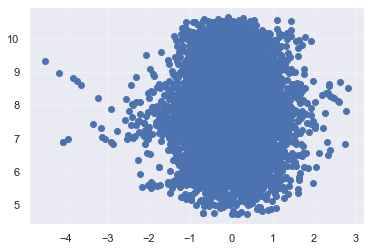

In [40]:
plt.scatter(log_results.resid, log_results.fittedvalues)
plt.grid(alpha = 0.3)

# There is no funnel pattern, so heteroskedasticity does not appear to be a problem

#### Measuring the performance with RMSE

In [41]:
def RMSE(resid):
    return np.sqrt(np.square(resid).sum()) / len(resid)

In [42]:
RMSE(log_results.resid)

# The RMSE measures the distance between the fitted values and the real values
# This is a really good RMSE score

0.006232045258864282

Each of these checks shows the model is worth using

### Predicting the income

Project Manager: "Predict the income I’m supposed to have knowing that my parents earned approximately the mean income of the country."

In [43]:
sub_log_us = sub_log.loc[(sub_log['countryname'] == 'United States')]
sub_log_us.describe()

,y_child,base_case,gj,mj,c_i_parent
count,77.000000,7.700000e+01,7.700000e+01,7.700000e+01,77.000000
mean,9.706621,6.600000e-01,4.510000e+01,1.014657e+01,51.701299
std,0.800800,1.229254e-15,5.721617e-14,1.251604e-14,28.521029
min,7.437257,6.600000e-01,4.510000e+01,1.014657e+01,1.000000
25%,9.219632,6.600000e-01,4.510000e+01,1.014657e+01,28.000000
50%,9.644639,6.600000e-01,4.510000e+01,1.014657e+01,55.000000
75%,10.291534,6.600000e-01,4.510000e+01,1.014657e+01,74.000000
max,11.578388,6.600000e-01,4.510000e+01,1.014657e+01,99.000000


In [44]:
# making a one-row dataframe with the mean independent variables for the model
us = pd.DataFrame([[10.15, 45.1, 52]], columns = ('mj', 'gj', 'c_i_parent'))
us

,mj,gj,c_i_parent
0,10.15,45.1,52


In [45]:
np.exp(log_results.predict(us))

# predict tends to produce a lower number. More realistically, this number would be closer to 23,000

0    18437.607448
dtype: float64

The predicted income for the project manager — knowing that his parents earned approximately the mean income of the country — is roughly __$18,500__.